# SymPy를 사용한 함수 미분

In [1]:
import numpy as np
import matplotlib.pyplot as plt


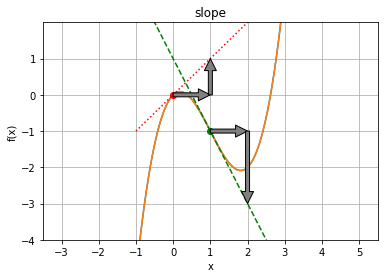

In [14]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x,y)
plt.grid()
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("slope")
plt.show()

In [15]:
from scipy.misc import derivative

In [19]:
derivative(f, 0, dx=1e-6)

1.000000000001

In [21]:
derivative(f, 1, dx=1e-6)

-2.000000000002

In [26]:
derivative(f, -0.5, dx=1e-6)

4.749999999886789

**미분(differentiation)**이란 어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어내는 작업

미분으로 만들어진 함수를 원래 함수의 **도함수(derivative)**라고 한다

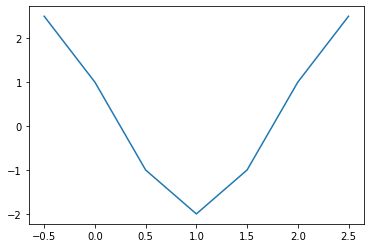

In [29]:
# 4.2.2
x = np.array([-0.5, 0, 0.5, 1, 1.5, 2, 2.5])
y = np.array([2.5, 1, -1, -2, -1, 1, 2.5])

plt.plot(x, y)
plt.show()

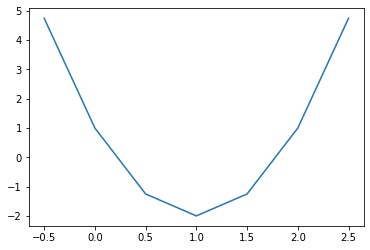

In [30]:
x = np.array([-0.5, 0, 0.5, 1, 1.5, 2, 2.5])
y = []
for i in x:
    y.append(derivative(f, i ,dx=1e-6))

plt.plot(x, y)
plt.show()

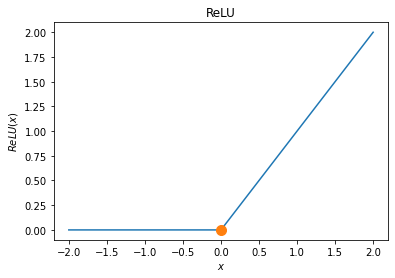

In [31]:
def relu(x):
    return np.where(x > 0, x, 0)


xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

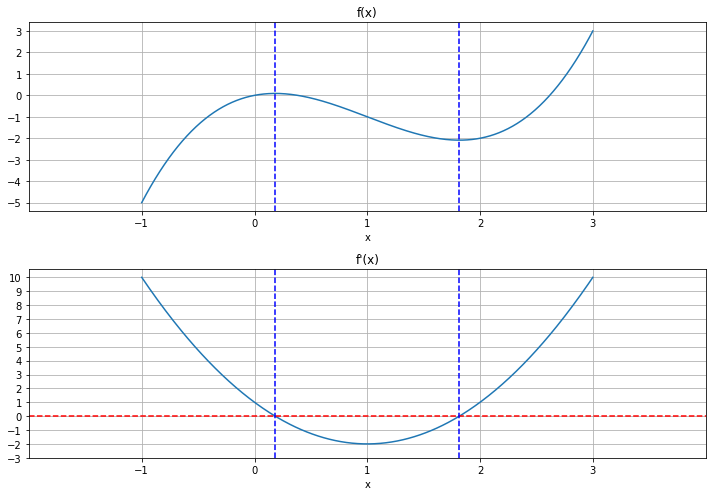

In [35]:
def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.grid()
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('f(x)')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.subplot(212)
plt.grid()
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("f'(x)")
plt.axhline(0, c="r", ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.tight_layout()
plt.show()

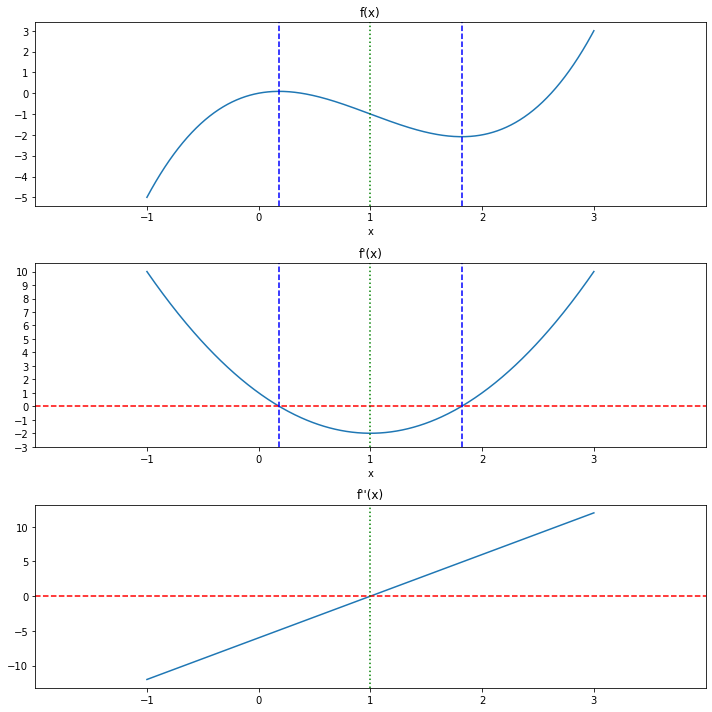

In [36]:
def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f''(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c="g", ls=":")

plt.tight_layout()
plt.show()

In [38]:
import sympy

In [39]:
x = sympy.symbols('x')
x

x

In [40]:
type(x)

sympy.core.symbol.Symbol

In [42]:
f = x* sympy.exp(x)
f

x*exp(x)

In [43]:
sympy.diff(f)

x*exp(x) + exp(x)

In [44]:
sympy.simplify(sympy.diff(f))

(x + 1)*exp(x)

In [50]:
x, y = sympy.symbols('x, y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

x**2 + 4*x*y + 4*y**2

In [52]:
sympy.diff(f, x)

2*x + 4*y

In [53]:
sympy.diff(f, y)

4*x + 8*y

In [54]:
sympy.diff(sympy.diff(f, x), x)

2

In [55]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

exp((-mu + x)**2/sigma**2)

In [56]:
sympy.diff(f, x)

(-2*mu + 2*x)*exp((-mu + x)**2/sigma**2)/sigma**2

In [57]:
sympy.simplify(sympy.diff(f, x))

2*(-mu + x)*exp((mu - x)**2/sigma**2)/sigma**2

In [58]:
sympy.diff(f, x, x)

2*(1 + 2*(mu - x)**2/sigma**2)*exp((mu - x)**2/sigma**2)/sigma**2

In [59]:
type(x)

sympy.core.symbol.Symbol

In [67]:
# 4.2.5
f1 = x**3 - 1
sympy.diff(f1, x)

3*x**2

In [68]:
k, log = sympy.symbols('k, log')
f2 = sympy.log(x**2 - 3*k)
f2

log(-3*k + x**2)

In [69]:
sympy.diff(f2, x)

2*x/(-3*k + x**2)

In [70]:
x, a, b = sympy.symbols('x a b')
f3 = sympy.exp(a * x ** b)
f3

exp(a*x**b)

In [71]:
sympy.diff(f3, x)

a*b*x**b*exp(a*x**b)/x

In [72]:
sympy.simplify(sympy.diff(f3, x))

a*b*x**(b - 1)*exp(a*x**b)

In [73]:
#4.2.6 
f4 = sympy.exp(x**2 + 2*y**2)
f4

exp(x**2 + 2*y**2)

In [75]:
sympy.diff(f4, x)

2*x*exp(x**2 + 2*y**2)

In [76]:
sympy.diff(f4, y)

4*y*exp(x**2 + 2*y**2)

In [77]:
sympy.diff(f4, x, x)

2*(2*x**2 + 1)*exp(x**2 + 2*y**2)

In [78]:
sympy.diff(f4, x, y)

8*x*y*exp(x**2 + 2*y**2)

In [79]:
sympy.diff(f4, y, x)

8*x*y*exp(x**2 + 2*y**2)

In [80]:
sympy.diff(f4, y, y)

4*(4*y**2 + 1)*exp(x**2 + 2*y**2)